In [11]:
import cv2
import supervision as sv
import numpy as np
from ultralytics import YOLO
from pathlib import Path

In [12]:
m = YOLO("yolov8n-seg.pt")  
res = m.predict("motociclista.jpg")


image 1/1 /home/clayton/dev/images_recon/motociclista.jpg: 512x640 1 person, 2 cars, 1 motorcycle, 169.8ms
Speed: 1.7ms preprocess, 169.8ms inference, 8.3ms postprocess per image at shape (1, 3, 512, 640)


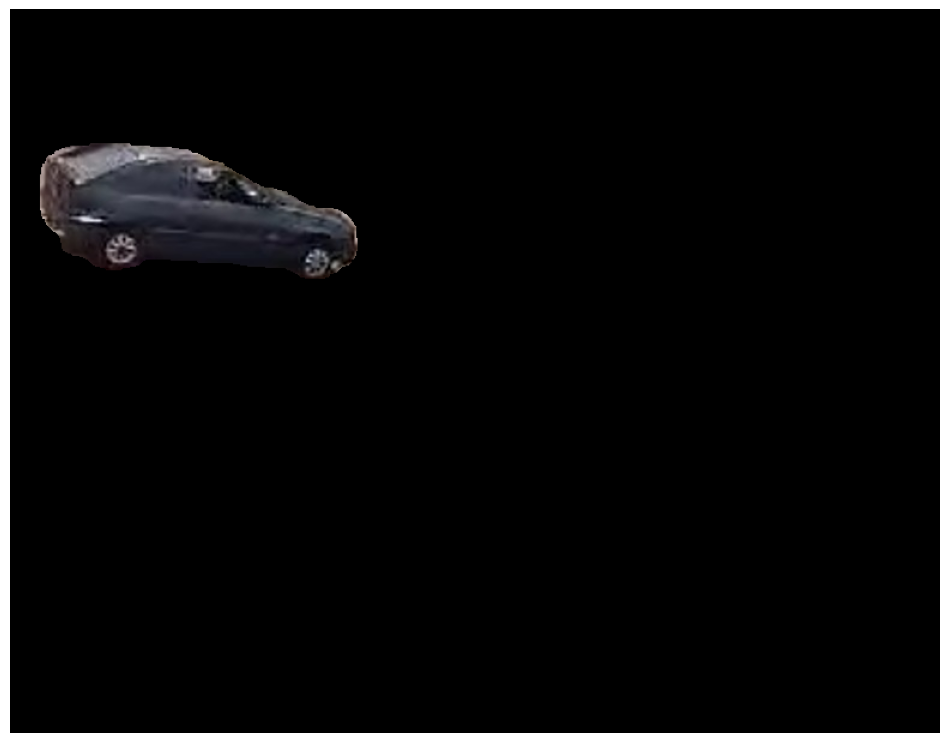

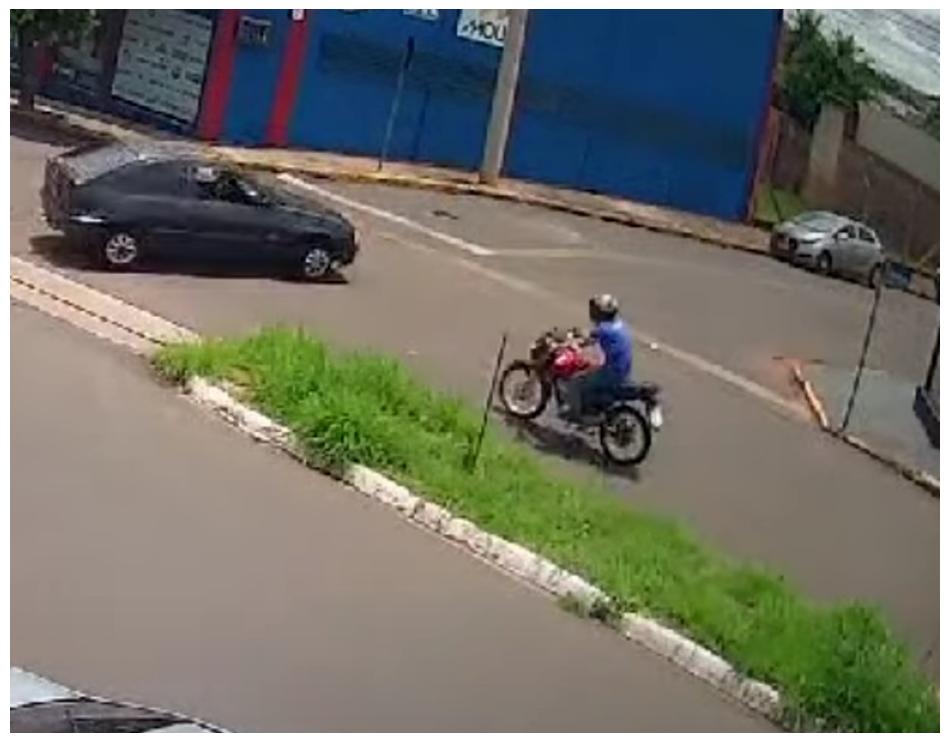

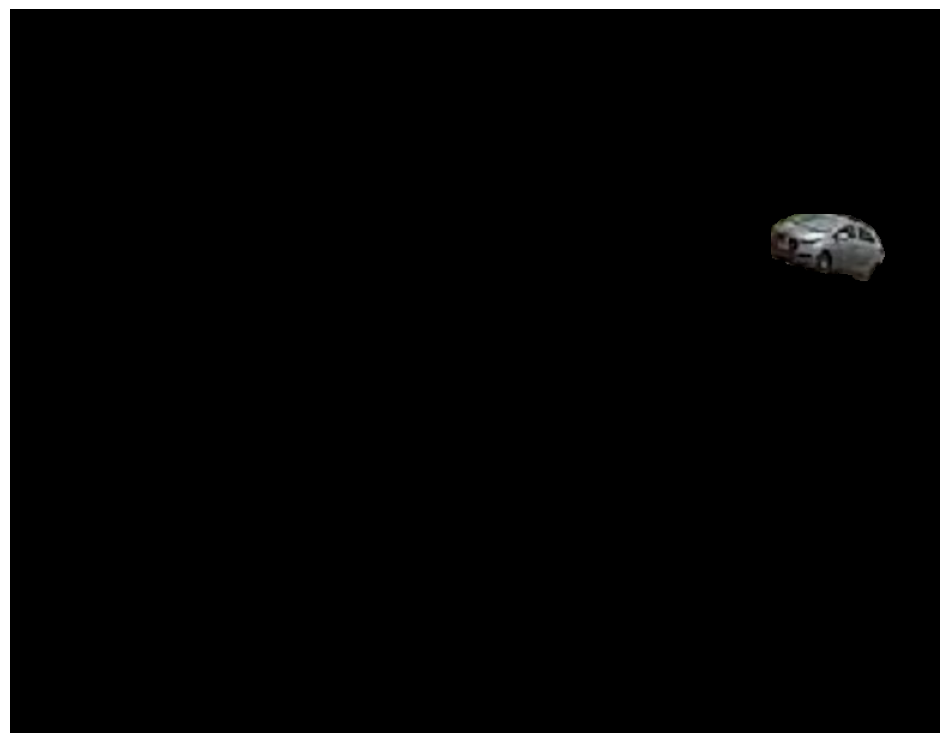

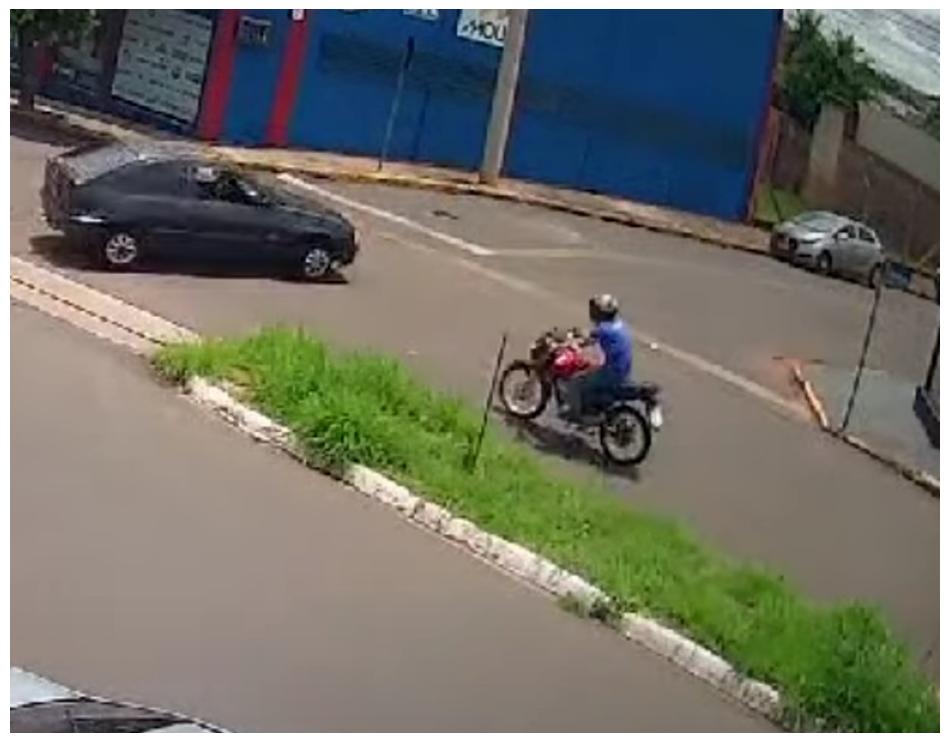

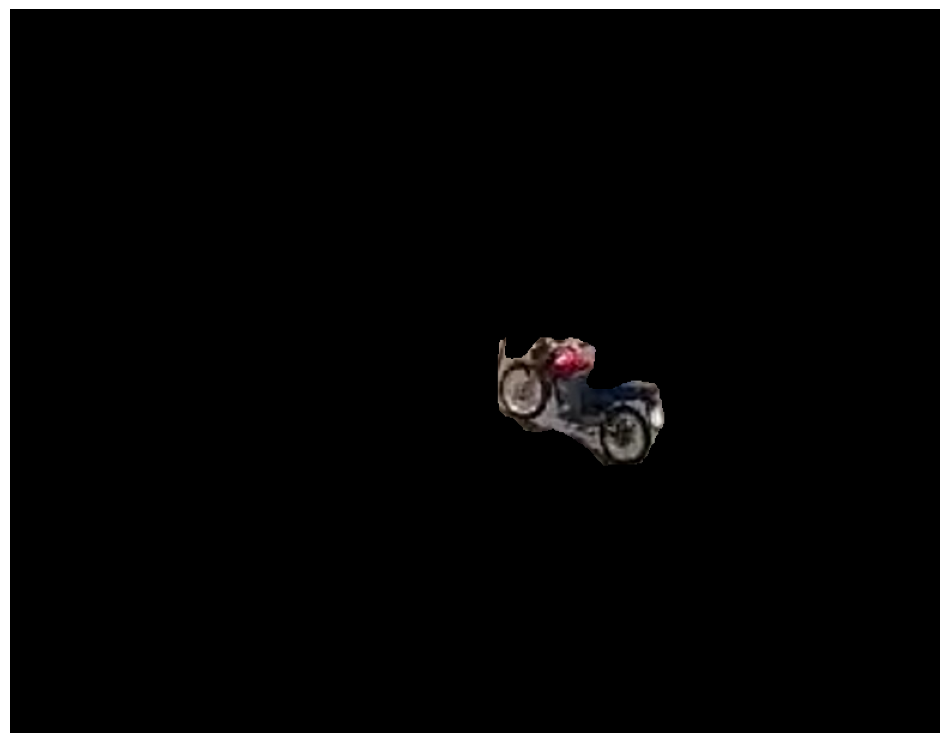

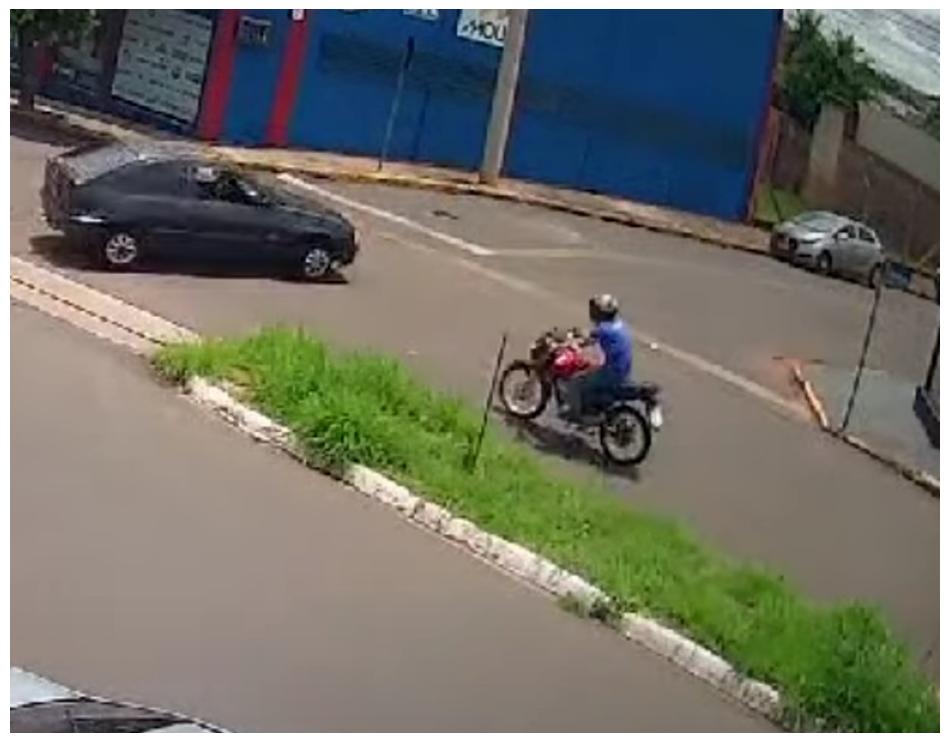

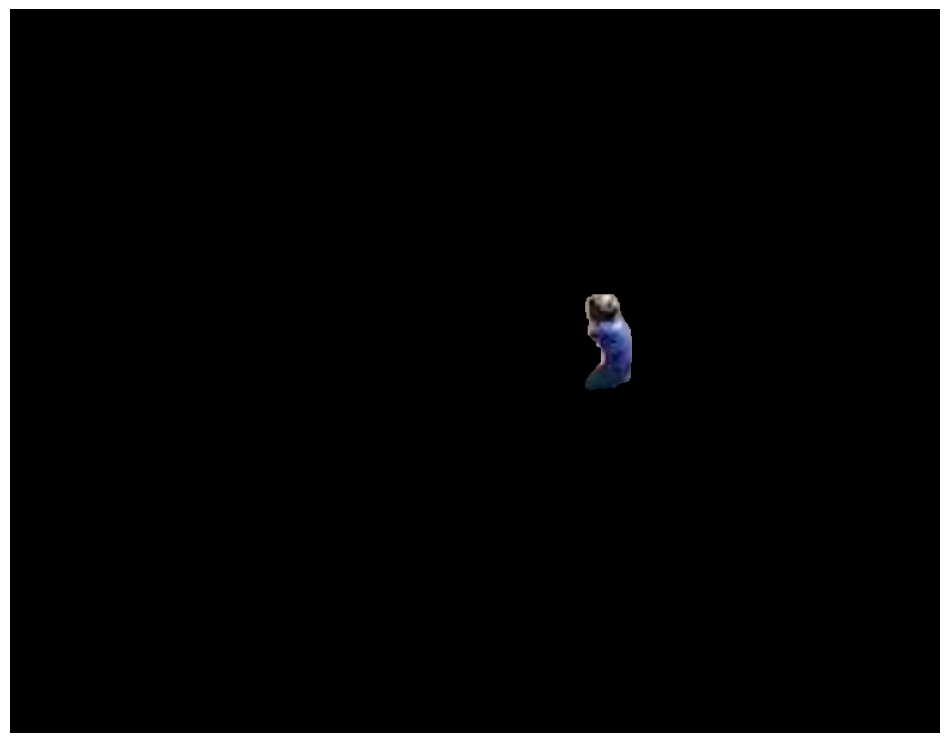

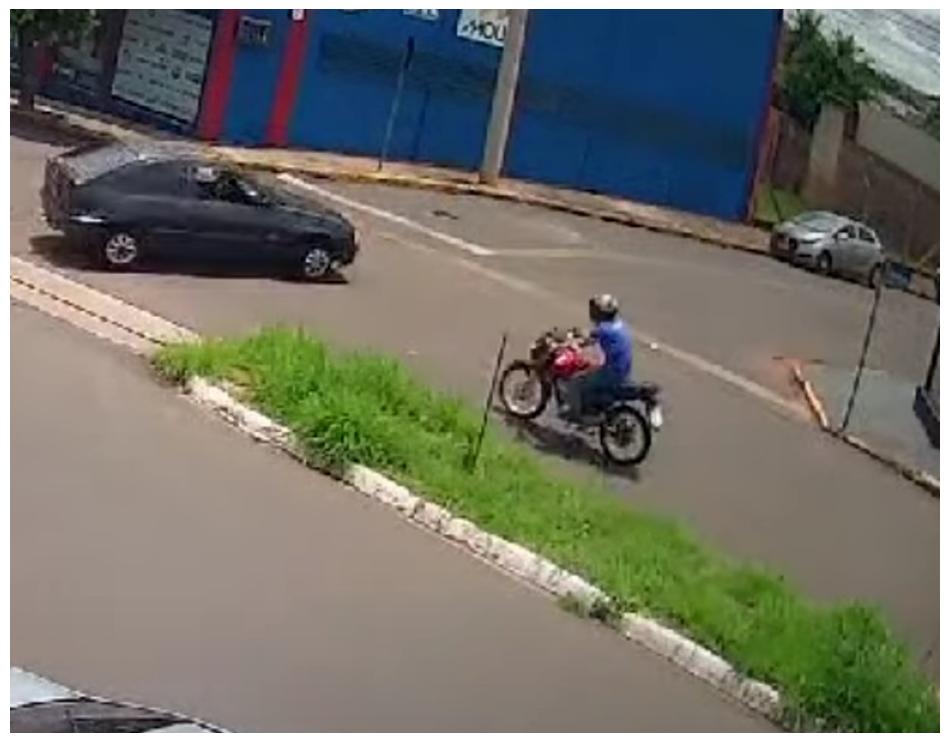

In [15]:
for r in res:
    img = np.copy(r.orig_img)
    img_name = Path(r.path).stem

    # A partir da imagem intera em cada item detectado
    for ci, c in enumerate(r):
        label = c.names[c.boxes.cls.tolist().pop()]

        b_mask = np.zeros(img.shape[:2], np.uint8)

        # Cria máscara de contorno
        contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
        _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

        # Objeto isolado com fundo preto
        mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
        isolated = cv2.bitwise_and(mask3ch, img)
        sv.plot_image(isolated)

        # Objeto isolado com fundo transparente (PNG)
        isolated = np.dstack([img, b_mask])
        sv.plot_image(isolated)

        # Corte do objeto
        x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)
        iso_crop = isolated[y1:y2, x1:x2]


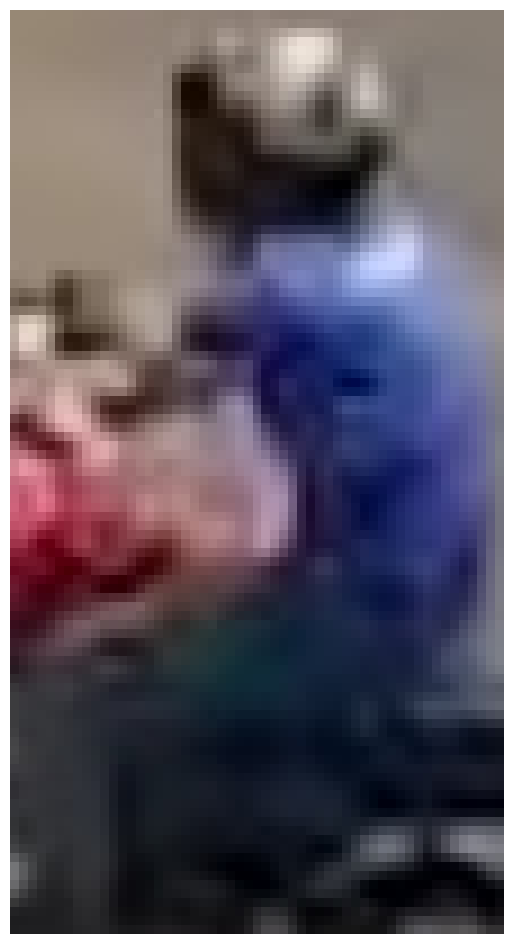

In [14]:
sv.plot_image(iso_crop)